In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 6)


In [4]:
from utils import *


In [5]:
ds_folder = 'datasets'

os.listdir(ds_folder)

['ad_campain_sep-2021_oct-2024_cleaned.csv',
 'dirty',
 'fb_post_df_cleaned.csv',
 'fb_video_df_cleaned.csv',
 'ig_media_df_cleaned.csv',
 'raw_data',
 'sales_2018-2024_cleaned.csv',
 'sales_2020-2024_even_cleaner.csv']

In [7]:
fb_post = pd.read_csv(os.path.join(ds_folder, 'fb_post_df_cleaned.csv'))

fb_post.head()


,id,message,promotion_status,status_type,created_time,properties,post_clicks,post_impressions,post_impressions_unique,post_impressions_paid,post_impressions_paid_unique,post_impressions_fan,post_impressions_fan_unique,post_impressions_organic,post_impressions_organic_unique,post_impressions_viral,post_impressions_viral_unique,post_impressions_nonviral,post_impressions_nonviral_unique,post_video_avg_time_watched,post_video_complete_views_organic,post_video_complete_views_organic_unique,post_video_complete_views_paid,post_video_complete_views_paid_unique,post_video_retention_graph,post_video_retention_graph_clicked_to_play,post_video_retention_graph_autoplayed,post_video_views_organic,post_video_views_organic_unique,post_video_views_paid,post_video_views,post_video_social_actions_count_unique,post_reactions_like_total,post_reactions_love_total,post_reactions_wow_total,post_reactions_haha_total,post_reactions_sorry_total,post_reactions_anger_total,engagement_rate,post_video_complete_views,video_completion_rate,reaction_diversity_score,post_video_retention_graph_avg,post_video_retention_graph_initial_drop,post_video_retention_graph_consistency,post_video_retention_graph_avg_drop_rate,post_video_retention_graph_clicked_to_play_avg,post_video_retention_graph_clicked_to_play_initial_drop,post_video_retention_graph_clicked_to_play_consistency,post_video_retention_graph_clicked_to_play_avg_drop_rate,post_video_retention_graph_autoplayed_avg,post_video_retention_graph_autoplayed_initial_drop,post_video_retention_graph_autoplayed_consistency,post_video_retention_graph_autoplayed_avg_drop_rate,post_clicks_by_type_other clicks,post_clicks_by_type_photo view,post_clicks_by_type_link clicks,post_clicks_by_type_video play,post_activity_by_action_type_like,post_activity_by_action_type_share,post_activity_by_action_type_comment,post_activity_by_action_type_unique_like,post_activity_by_action_type_unique_share,post_activity_by_action_type_unique_comment
0,124319427612935_1111928650936172,🎉 November Art Sale Alert! 🎉\n\nSnag your favo...,inactive,added_photos,2024-11-03T21:12:14+0000,NaN,16,358,357,0,0,313,310,358,357,0,0,358,357,NaN,0,0,0,0,{},{},{},0,0,0,0,0,3,2,0,0,0,0,0.058659,0,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,5.0,NaN,5.0,NaN,NaN,5.0,NaN,NaN
1,124319427612935_1089125369883167,You are in our hearts.,inactive,added_photos,2024-10-07T20:35:31+0000,NaN,216,1888,1877,0,0,1666,1657,1888,1877,72,69,1816,1811,NaN,0,0,0,0,{},{},{},0,0,0,0,0,42,2,0,0,8,0,0.141949,0,0.000000,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.0,8.0,NaN,NaN,52.0,2.0,3.0,52.0,2.0,3.0
2,124319427612935_1083224957139875,✨ We just finished this stunning piece!✨\n\nDo...,inactive,added_photos,2024-09-30T23:24:18+0000,NaN,111,1292,1292,0,0,1140,1140,1292,1292,24,24,1268,1267,NaN,0,0,0,0,{},{},{},0,0,0,0,0,41,19,6,0,0,0,0.136997,0,0.000000,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,58.0,NaN,NaN,65.0,2.0,7.0,65.0,2.0,7.0
3,124319427612935_1025065006289204,✨ This one is for the book lovers 📚✨\nTag a fr...,inactive,added_video,2024-07-15T18:10:57+0000,"[{'name': 'Length', 'text': '00:21'}]",8,447,413,0,0,248,231,447,413,8,8,439,408,10909.0,82,72,0,0,"{""0"": 0.9922, ""1"": 0.9922, ""2"": 0.9922, ""3"": 0...","{""0"": 1, ""1"": 1, ""2"": 1, ""3"": 1, ""4"": 1, ""5"": ...","{""0"": 0.9919, ""1"": 0.9919, ""2"": 0.9919, ""3"": 0...",257,223,0,257,22,11,9,0,0,0,0,0.062640,82,0.319066,0.500000,0.572444,0.505846,0.258012,0.05027,0.760024,0.2727,0.141017,0.01779,0.564072,0.516383,0.263427,0.052464,8.0,NaN,NaN,NaN,20.0,3.0,3.0,19.0,3.0,3.0
4,124319427612935_997016089094096,Your words mean the world to us! 🌟 Swipe to se...,inactive,added_photos,2024-06-06T14:09:08+0000,NaN,15,481,448,0,0,374,350,481,448,0,0,481,448,NaN,0,0,0,0,{},{},{},0,0,0,0,0,6,1,0,0,0,0,0.045738,0,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,12.0,NaN,NaN,7.0,NaN,2.0,7.0,NaN,2.0


In [42]:
fb_post['post_id'] = fb_post['id'].str.split('_').str[1].astype(int)


In [65]:
fb_post['post_video_view_time'] = fb_post['post_video_avg_time_watched'] * fb_post['post_video_views']

In [43]:
fb_post[fb_post.post_id == 929095455886160]


,id,message,promotion_status,status_type,created_time,properties,post_clicks,post_impressions,post_impressions_unique,post_impressions_paid,post_impressions_paid_unique,post_impressions_fan,post_impressions_fan_unique,post_impressions_organic,post_impressions_organic_unique,post_impressions_viral,post_impressions_viral_unique,post_impressions_nonviral,post_impressions_nonviral_unique,post_video_avg_time_watched,post_video_complete_views_organic,post_video_complete_views_organic_unique,post_video_complete_views_paid,post_video_complete_views_paid_unique,post_video_retention_graph,post_video_retention_graph_clicked_to_play,post_video_retention_graph_autoplayed,post_video_views_organic,post_video_views_organic_unique,post_video_views_paid,post_video_views,post_video_social_actions_count_unique,post_reactions_like_total,post_reactions_love_total,post_reactions_wow_total,post_reactions_haha_total,post_reactions_sorry_total,post_reactions_anger_total,engagement_rate,post_video_complete_views,video_completion_rate,reaction_diversity_score,post_video_retention_graph_avg,post_video_retention_graph_initial_drop,post_video_retention_graph_consistency,post_video_retention_graph_avg_drop_rate,post_video_retention_graph_clicked_to_play_avg,post_video_retention_graph_clicked_to_play_initial_drop,post_video_retention_graph_clicked_to_play_consistency,post_video_retention_graph_clicked_to_play_avg_drop_rate,post_video_retention_graph_autoplayed_avg,post_video_retention_graph_autoplayed_initial_drop,post_video_retention_graph_autoplayed_consistency,post_video_retention_graph_autoplayed_avg_drop_rate,post_clicks_by_type_other clicks,post_clicks_by_type_photo view,post_clicks_by_type_link clicks,post_clicks_by_type_video play,post_activity_by_action_type_like,post_activity_by_action_type_share,post_activity_by_action_type_comment,post_activity_by_action_type_unique_like,post_activity_by_action_type_unique_share,post_activity_by_action_type_unique_comment,post_id


In [62]:
fb_video = pd.read_csv(os.path.join(ds_folder, 'fb_video_df_cleaned.csv'))

print(fb_video.shape)
fb_video.head()


(50, 124)


,id,created_time,post_id,permalink_url,content_category,published,length,is_crosspost_video,description,total_video_views,total_video_views_unique,total_video_views_autoplayed,total_video_views_clicked_to_play,total_video_views_organic,total_video_views_organic_unique,total_video_views_paid,total_video_views_paid_unique,total_video_views_sound_on,total_video_view_time_by_country_id,total_video_view_time_by_region_id,total_video_view_time_by_age_bucket_and_gender,total_video_play_count,total_video_consumption_rate,total_video_complete_views,total_video_complete_views_unique,total_video_complete_views_auto_played,total_video_complete_views_clicked_to_play,total_video_complete_views_organic,total_video_complete_views_organic_unique,total_video_complete_views_paid,total_video_complete_views_paid_unique,total_video_60s_excludes_shorter_views,total_video_30s_views,total_video_30s_views_unique,total_video_30s_views_auto_played,total_video_30s_views_clicked_to_play,total_video_30s_views_organic,total_video_30s_views_paid,total_video_10s_views,total_video_10s_views_unique,total_video_10s_views_auto_played,total_video_10s_views_clicked_to_play,total_video_10s_views_organic,total_video_10s_views_paid,total_video_10s_views_sound_on,total_video_15s_views,total_video_retention_graph,total_video_retention_graph_autoplayed,total_video_retention_graph_clicked_to_play,total_video_retention_graph_gender_male,total_video_retention_graph_gender_female,total_video_avg_time_watched,total_video_view_total_time,total_video_view_total_time_organic,total_video_view_total_time_paid,total_video_impressions,total_video_impressions_unique,total_video_impressions_paid_unique,total_video_impressions_paid,total_video_impressions_organic_unique,total_video_impressions_organic,total_video_impressions_viral_unique,total_video_impressions_viral,total_video_impressions_fan_unique,total_video_impressions_fan,total_video_impressions_fan_paid_unique,total_video_impressions_fan_paid,post_video_avg_time_watched,post_video_view_time,post_impressions_unique,blue_reels_play_count,fb_reels_total_plays,fb_reels_replay_count,post_video_retention_graph,post_video_followers,total_video_retention_graph_avg,total_video_retention_graph_initial_drop,total_video_retention_graph_consistency,total_video_retention_graph_avg_drop_rate,total_video_retention_graph_autoplayed_avg,total_video_retention_graph_autoplayed_initial_drop,total_video_retention_graph_autoplayed_consistency,total_video_retention_graph_autoplayed_avg_drop_rate,total_video_retention_graph_clicked_to_play_avg,total_video_retention_graph_clicked_to_play_initial_drop,total_video_retention_graph_clicked_to_play_consistency,total_video_retention_graph_clicked_to_play_avg_drop_rate,total_video_retention_graph_gender_male_avg,total_video_retention_graph_gender_male_initial_drop,total_video_retention_graph_gender_male_consistency,total_video_retention_graph_gender_male_avg_drop_rate,total_video_retention_graph_gender_female_avg,total_video_retention_graph_gender_female_initial_drop,total_video_retention_graph_gender_female_consistency,total_video_retention_graph_gender_female_avg_drop_rate,post_video_retention_graph_avg,post_video_retention_graph_initial_drop,post_video_retention_graph_consistency,post_video_retention_graph_avg_drop_rate,is_reel,post_type,privacy_allow,privacy_deny,privacy_description,privacy_friends,privacy_networks,privacy_value,total_video_views_by_distribution_type_page_owned,total_video_views_by_distribution_type_shared,total_video_view_time_by_distribution_type_page_owned,total_video_view_time_by_distribution_type_shared,total_video_stories_by_action_type_share,total_video_stories_by_action_type_like,total_video_stories_by_action_type_comment,total_video_reactions_by_type_total_like,total_video_reactions_by_type_total_love,post_video_likes_by_reaction_type_REACTION_LIKE,post_video_likes_by_reaction_type_REACTION_LOVE,post_video_likes_by_reaction_type_REACTION_WOW,post_video_likes_by_reaction_type_REACTI

In [31]:
print([col for col in fb_video.columns])


['id', 'permalink_url', 'views', 'content_category', 'published', 'post_views', 'length', 'is_crosspost_video', 'description', 'total_video_views', 'total_video_views_unique', 'total_video_views_autoplayed', 'total_video_views_clicked_to_play', 'total_video_views_organic', 'total_video_views_organic_unique', 'total_video_views_paid', 'total_video_views_paid_unique', 'total_video_views_sound_on', 'total_video_view_time_by_country_id', 'total_video_view_time_by_region_id', 'total_video_view_time_by_age_bucket_and_gender', 'total_video_play_count', 'total_video_consumption_rate', 'total_video_complete_views', 'total_video_complete_views_unique', 'total_video_complete_views_auto_played', 'total_video_complete_views_clicked_to_play', 'total_video_complete_views_organic', 'total_video_complete_views_organic_unique', 'total_video_complete_views_paid', 'total_video_complete_views_paid_unique', 'total_video_60s_excludes_shorter_views', 'total_video_30s_views', 'total_video_30s_views_unique', 't

In [26]:
fb_video.privacy_description.value_counts()


privacy_description
Public     130
Only me     29
Name: count, dtype: int64

In [45]:
fb_video[(fb_video.privacy_description == 'Public') & ~fb_video.is_reel]


,id,created_time,post_id,permalink_url,content_category,published,length,is_crosspost_video,description,total_video_views,total_video_views_unique,total_video_views_autoplayed,total_video_views_clicked_to_play,total_video_views_organic,total_video_views_organic_unique,total_video_views_paid,total_video_views_paid_unique,total_video_views_sound_on,total_video_view_time_by_country_id,total_video_view_time_by_region_id,total_video_view_time_by_age_bucket_and_gender,total_video_play_count,total_video_consumption_rate,total_video_complete_views,total_video_complete_views_unique,total_video_complete_views_auto_played,total_video_complete_views_clicked_to_play,total_video_complete_views_organic,total_video_complete_views_organic_unique,total_video_complete_views_paid,total_video_complete_views_paid_unique,total_video_60s_excludes_shorter_views,total_video_30s_views,total_video_30s_views_unique,total_video_30s_views_auto_played,total_video_30s_views_clicked_to_play,total_video_30s_views_organic,total_video_30s_views_paid,total_video_10s_views,total_video_10s_views_unique,total_video_10s_views_auto_played,total_video_10s_views_clicked_to_play,total_video_10s_views_organic,total_video_10s_views_paid,total_video_10s_views_sound_on,total_video_15s_views,total_video_retention_graph,total_video_retention_graph_autoplayed,total_video_retention_graph_clicked_to_play,total_video_retention_graph_gender_male,total_video_retention_graph_gender_female,total_video_avg_time_watched,total_video_view_total_time,total_video_view_total_time_organic,total_video_view_total_time_paid,total_video_impressions,total_video_impressions_unique,total_video_impressions_paid_unique,total_video_impressions_paid,total_video_impressions_organic_unique,total_video_impressions_organic,total_video_impressions_viral_unique,total_video_impressions_viral,total_video_impressions_fan_unique,total_video_impressions_fan,total_video_impressions_fan_paid_unique,total_video_impressions_fan_paid,view_to_completion_ratio,avg_watch_time_per_view,engagement_rate,total_video_retention_graph_avg,total_video_retention_graph_initial_drop,total_video_retention_graph_consistency,total_video_retention_graph_avg_drop_rate,total_video_retention_graph_autoplayed_avg,total_video_retention_graph_autoplayed_initial_drop,total_video_retention_graph_autoplayed_consistency,total_video_retention_graph_autoplayed_avg_drop_rate,total_video_retention_graph_clicked_to_play_avg,total_video_retention_graph_clicked_to_play_initial_drop,total_video_retention_graph_clicked_to_play_consistency,total_video_retention_graph_clicked_to_play_avg_drop_rate,total_video_retention_graph_gender_male_avg,total_video_retention_graph_gender_male_initial_drop,total_video_retention_graph_gender_male_consistency,total_video_retention_graph_gender_male_avg_drop_rate,total_video_retention_graph_gender_female_avg,total_video_retention_graph_gender_female_initial_drop,total_video_retention_graph_gender_female_consistency,total_video_retention_graph_gender_female_avg_drop_rate,is_reel,post_type,privacy_allow,privacy_deny,privacy_description,privacy_friends,privacy_networks,privacy_value,total_video_views_by_distribution_type_page_owned,total_video_views_by_distribution_type_shared,total_video_view_time_by_distribution_type_page_owned,total_video_view_time_by_distribution_type_shared,total_video_stories_by_action_type_share,total_video_stories_by_action_type_like,total_video_stories_by_action_type_comment,total_video_reactions_by_type_total_like,total_video_reactions_by_type_total_love
28,1482197965720963,2024-07-15T18:10:34+0000,1025065006289204,/1119289093533461/videos/1482197965720963?st=6...,ENTERTAINMENT,True,20.300,False,✨ This one is for the book lovers 📚✨\nTag a fr...,258.0,223.0,247.0,11.0,258.0,223.0,0.0,0.0,89.0,"{""United States (US)"": 45, ""Israel (IL)"": 6, ""...","{""Nevada - United States"": 396976, ""Florida - ...","{""F.13-17"": 2816, ""F.18-24"": 27158, ""M.18-24"":...",427.0,0.538647,83.0,72.0,75.0,8.0,83.0,72.0

In [67]:
fb_post_video = fb_post[fb_post.status_type == 'added_video']

print(fb_post_video.shape)
fb_post_video.sort_values(by='created_time', ascending=False)
# 1482197965720963

(109, 66)


,id,message,promotion_status,status_type,created_time,properties,post_clicks,post_impressions,post_impressions_unique,post_impressions_paid,post_impressions_paid_unique,post_impressions_fan,post_impressions_fan_unique,post_impressions_organic,post_impressions_organic_unique,post_impressions_viral,post_impressions_viral_unique,post_impressions_nonviral,post_impressions_nonviral_unique,post_video_avg_time_watched,post_video_complete_views_organic,post_video_complete_views_organic_unique,post_video_complete_views_paid,post_video_complete_views_paid_unique,post_video_retention_graph,post_video_retention_graph_clicked_to_play,post_video_retention_graph_autoplayed,post_video_views_organic,post_video_views_organic_unique,post_video_views_paid,post_video_views,post_video_social_actions_count_unique,post_reactions_like_total,post_reactions_love_total,post_reactions_wow_total,post_reactions_haha_total,post_reactions_sorry_total,post_reactions_anger_total,engagement_rate,post_video_complete_views,video_completion_rate,reaction_diversity_score,post_video_retention_graph_avg,post_video_retention_graph_initial_drop,post_video_retention_graph_consistency,post_video_retention_graph_avg_drop_rate,post_video_retention_graph_clicked_to_play_avg,post_video_retention_graph_clicked_to_play_initial_drop,post_video_retention_graph_clicked_to_play_consistency,post_video_retention_graph_clicked_to_play_avg_drop_rate,post_video_retention_graph_autoplayed_avg,post_video_retention_graph_autoplayed_initial_drop,post_video_retention_graph_autoplayed_consistency,post_video_retention_graph_autoplayed_avg_drop_rate,post_clicks_by_type_other clicks,post_clicks_by_type_photo view,post_clicks_by_type_link clicks,post_clicks_by_type_video play,post_activity_by_action_type_like,post_activity_by_action_type_share,post_activity_by_action_type_comment,post_activity_by_action_type_unique_like,post_activity_by_action_type_unique_share,post_activity_by_action_type_unique_comment,post_id,post_video_view_time
3,124319427612935_1025065006289204,✨ This one is for the book lovers 📚✨\nTag a fr...,inactive,added_video,2024-07-15T18:10:57+0000,"[{'name': 'Length', 'text': '00:21'}]",8,447,413,0,0,248,231,447,413,8,8,439,408,10909.0,82,72,0,0,"{""0"": 0.9922, ""1"": 0.9922, ""2"": 0.9922, ""3"": 0...","{""0"": 1, ""1"": 1, ""2"": 1, ""3"": 1, ""4"": 1, ""5"": ...","{""0"": 0.9919, ""1"": 0.9919, ""2"": 0.9919, ""3"": 0...",257,223,0,257,22,11,9,0,0,0,0,0.062640,82,0.319066,0.500000,0.572444,0.505846,0.258012,0.050270,0.760024,0.2727,0.141017,0.017790,0.564072,0.516383,0.263427,0.052464,8.0,NaN,NaN,NaN,20.0,3.0,3.0,19.0,3.0,3.0,1025065006289204,2803613.0
56,124319427612935_643153021147073,Just one of many pieces on sale for Valentine'...,inactive,added_video,2023-01-31T19:40:44+0000,"[{'name': 'Length', 'text': '00:17'}]",98,886,795,0,0,468,412,886,795,391,343,495,476,6210.0,96,91,0,0,"{""0"": 0.9919, ""1"": 0.9946, ""2"": 0.9946, ""3"": 0...","{""0"": 1, ""1"": 1, ""2"": 1, ""3"": 1, ""4"": 1, ""5"": ...","{""0"": 0.9912, ""1"": 0.9941, ""2"": 0.9941, ""3"": 0...",371,349,0,371,18,12,6,0,0,0,0,0.130926,96,0.258760,0.500000,0.610195,0.391269,0.264890,0.068066,0.781871,0.1613,0.188889,0.041365,0.594538,0.412429,0.272614,0.071311,34.0,NaN,NaN,64.0,18.0,NaN,2.0,17.0,NaN,2.0,643153021147073,2303910.0
60,124319427612935_630969385698770,"It's looking to be a beautiful year, and we're...",inactive,added_video,2023-01-17T21:14:47+0000,"[{'name': 'Length', 'text': '00:14'}]",26,785,738,0,0,369,333,785,738,303,270,482,476,5179.0,68,64,0,0,"{""0"": 0.9914, ""1"": 0.9914, ""2"": 1, ""3"": 0.9914...","{""0"": 1, ""1"": 1, ""2"": 1, ""3"": 1, ""4"": 0.9474, ...","{""0"": 0.986, ""1"": 0.986, ""2"": 0.9953, ""3"": 0.9...",233,204,0,233,14,12,3,0,0,0,0,0.052229,68,0.291845,0.500000,0.633682,0.406899,0.276408,0.073048,0.662559,0.5263,0.249682,0.049203,0.628165,0.396247,0.277915,0.075325,11.0,NaN,NaN,15.0,15.0,NaN,NaN,14.0,NaN,NaN,630969385698770,1206707.0
...,...,...,...,...,...,...,...,...,...,..

In [68]:
def time_to_seconds(time_str):
    if pd.isna(time_str):
        return None
    try:
        # Extract the time string from the properties list
        time_str = eval(time_str)[0]['text']
        minutes, seconds = map(int, time_str.split(':'))
        return minutes * 60 + seconds
    except:
        return None

# Create new column with length in seconds
fb_post['length'] = fb_post['properties'].apply(time_to_seconds)

In [63]:
fb_reel = fb_video[fb_video.is_reel]

fb_reel = fb_reel.sort_values(by='created_time', ascending=False)
fb_reel


,id,created_time,post_id,permalink_url,content_category,published,length,is_crosspost_video,description,total_video_views,total_video_views_unique,total_video_views_autoplayed,total_video_views_clicked_to_play,total_video_views_organic,total_video_views_organic_unique,total_video_views_paid,total_video_views_paid_unique,total_video_views_sound_on,total_video_view_time_by_country_id,total_video_view_time_by_region_id,total_video_view_time_by_age_bucket_and_gender,total_video_play_count,total_video_consumption_rate,total_video_complete_views,total_video_complete_views_unique,total_video_complete_views_auto_played,total_video_complete_views_clicked_to_play,total_video_complete_views_organic,total_video_complete_views_organic_unique,total_video_complete_views_paid,total_video_complete_views_paid_unique,total_video_60s_excludes_shorter_views,total_video_30s_views,total_video_30s_views_unique,total_video_30s_views_auto_played,total_video_30s_views_clicked_to_play,total_video_30s_views_organic,total_video_30s_views_paid,total_video_10s_views,total_video_10s_views_unique,total_video_10s_views_auto_played,total_video_10s_views_clicked_to_play,total_video_10s_views_organic,total_video_10s_views_paid,total_video_10s_views_sound_on,total_video_15s_views,total_video_retention_graph,total_video_retention_graph_autoplayed,total_video_retention_graph_clicked_to_play,total_video_retention_graph_gender_male,total_video_retention_graph_gender_female,total_video_avg_time_watched,total_video_view_total_time,total_video_view_total_time_organic,total_video_view_total_time_paid,total_video_impressions,total_video_impressions_unique,total_video_impressions_paid_unique,total_video_impressions_paid,total_video_impressions_organic_unique,total_video_impressions_organic,total_video_impressions_viral_unique,total_video_impressions_viral,total_video_impressions_fan_unique,total_video_impressions_fan,total_video_impressions_fan_paid_unique,total_video_impressions_fan_paid,post_video_avg_time_watched,post_video_view_time,post_impressions_unique,blue_reels_play_count,fb_reels_total_plays,fb_reels_replay_count,post_video_retention_graph,post_video_followers,total_video_retention_graph_avg,total_video_retention_graph_initial_drop,total_video_retention_graph_consistency,total_video_retention_graph_avg_drop_rate,total_video_retention_graph_autoplayed_avg,total_video_retention_graph_autoplayed_initial_drop,total_video_retention_graph_autoplayed_consistency,total_video_retention_graph_autoplayed_avg_drop_rate,total_video_retention_graph_clicked_to_play_avg,total_video_retention_graph_clicked_to_play_initial_drop,total_video_retention_graph_clicked_to_play_consistency,total_video_retention_graph_clicked_to_play_avg_drop_rate,total_video_retention_graph_gender_male_avg,total_video_retention_graph_gender_male_initial_drop,total_video_retention_graph_gender_male_consistency,total_video_retention_graph_gender_male_avg_drop_rate,total_video_retention_graph_gender_female_avg,total_video_retention_graph_gender_female_initial_drop,total_video_retention_graph_gender_female_consistency,total_video_retention_graph_gender_female_avg_drop_rate,post_video_retention_graph_avg,post_video_retention_graph_initial_drop,post_video_retention_graph_consistency,post_video_retention_graph_avg_drop_rate,is_reel,post_type,privacy_allow,privacy_deny,privacy_description,privacy_friends,privacy_networks,privacy_value,total_video_views_by_distribution_type_page_owned,total_video_views_by_distribution_type_shared,total_video_view_time_by_distribution_type_page_owned,total_video_view_time_by_distribution_type_shared,total_video_stories_by_action_type_share,total_video_stories_by_action_type_like,total_video_stories_by_action_type_comment,total_video_reactions_by_type_total_like,total_video_reactions_by_type_total_love,post_video_likes_by_reaction_type_REACTION_LIKE,post_video_likes_by_reaction_type_REACTION_LOVE,post_video_likes_by_reaction_type_REACTION_WOW,post_video_likes_by_reaction_type_REACTI

In [53]:
fb_post

,id,message,promotion_status,status_type,created_time,properties,post_clicks,post_impressions,post_impressions_unique,post_impressions_paid,post_impressions_paid_unique,post_impressions_fan,post_impressions_fan_unique,post_impressions_organic,post_impressions_organic_unique,post_impressions_viral,post_impressions_viral_unique,post_impressions_nonviral,post_impressions_nonviral_unique,post_video_avg_time_watched,post_video_complete_views_organic,post_video_complete_views_organic_unique,post_video_complete_views_paid,post_video_complete_views_paid_unique,post_video_retention_graph,post_video_retention_graph_clicked_to_play,post_video_retention_graph_autoplayed,post_video_views_organic,post_video_views_organic_unique,post_video_views_paid,post_video_views,post_video_social_actions_count_unique,post_reactions_like_total,post_reactions_love_total,post_reactions_wow_total,post_reactions_haha_total,post_reactions_sorry_total,post_reactions_anger_total,engagement_rate,post_video_complete_views,video_completion_rate,reaction_diversity_score,post_video_retention_graph_avg,post_video_retention_graph_initial_drop,post_video_retention_graph_consistency,post_video_retention_graph_avg_drop_rate,post_video_retention_graph_clicked_to_play_avg,post_video_retention_graph_clicked_to_play_initial_drop,post_video_retention_graph_clicked_to_play_consistency,post_video_retention_graph_clicked_to_play_avg_drop_rate,post_video_retention_graph_autoplayed_avg,post_video_retention_graph_autoplayed_initial_drop,post_video_retention_graph_autoplayed_consistency,post_video_retention_graph_autoplayed_avg_drop_rate,post_clicks_by_type_other clicks,post_clicks_by_type_photo view,post_clicks_by_type_link clicks,post_clicks_by_type_video play,post_activity_by_action_type_like,post_activity_by_action_type_share,post_activity_by_action_type_comment,post_activity_by_action_type_unique_like,post_activity_by_action_type_unique_share,post_activity_by_action_type_unique_comment,post_id
0,124319427612935_1111928650936172,🎉 November Art Sale Alert! 🎉\n\nSnag your favo...,inactive,added_photos,2024-11-03T21:12:14+0000,NaN,16,358,357,0,0,313,310,358,357,0,0,358,357,NaN,0,0,0,0,{},{},{},0,0,0,0,0,3,2,0,0,0,0,0.058659,0,0.0,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,5.0,NaN,5.0,NaN,NaN,5.0,NaN,NaN,1111928650936172
1,124319427612935_1089125369883167,You are in our hearts.,inactive,added_photos,2024-10-07T20:35:31+0000,NaN,216,1888,1877,0,0,1666,1657,1888,1877,72,69,1816,1811,NaN,0,0,0,0,{},{},{},0,0,0,0,0,42,2,0,0,8,0,0.141949,0,0.0,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.0,8.0,NaN,NaN,52.0,2.0,3.0,52.0,2.0,3.0,1089125369883167
2,124319427612935_1083224957139875,✨ We just finished this stunning piece!✨\n\nDo...,inactive,added_photos,2024-09-30T23:24:18+0000,NaN,111,1292,1292,0,0,1140,1140,1292,1292,24,24,1268,1267,NaN,0,0,0,0,{},{},{},0,0,0,0,0,41,19,6,0,0,0,0.136997,0,0.0,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,58.0,NaN,NaN,65.0,2.0,7.0,65.0,2.0,7.0,1083224957139875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,124319427612935_150000208363797,המשלוח הגדול בדרך.. עוד חודש בערך אני עולה לארץ..,ineligible,mobile_status_update,2010-09-12T16:08:06+0000,NaN,0,2,2,0,0,2,2,2,2,0,0,2,2,NaN,0,0,0,0,{},{},{},0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0.0,0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150000208363797
590,124319427612935_143902568974864,אתמול ראיתי את צעצוע של סיפור בתלת מימד וזה הז...,ineligible,mobile_status_update,2010-08-19T08:38:33+0000,NaN,0,3,3,0,0,2,2,3,3,0,0,3,3,NaN,0,0,0,0,{},{},{},0,0,0,0,0,2,0,0,0,0,0,0.666667,0,0.0,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,143902568974864
591,1243194

In [57]:
fb_post[fb_post.post_id == 8157672074248294]


,id,message,promotion_status,status_type,created_time,properties,post_clicks,post_impressions,post_impressions_unique,post_impressions_paid,post_impressions_paid_unique,post_impressions_fan,post_impressions_fan_unique,post_impressions_organic,post_impressions_organic_unique,post_impressions_viral,post_impressions_viral_unique,post_impressions_nonviral,post_impressions_nonviral_unique,post_video_avg_time_watched,post_video_complete_views_organic,post_video_complete_views_organic_unique,post_video_complete_views_paid,post_video_complete_views_paid_unique,post_video_retention_graph,post_video_retention_graph_clicked_to_play,post_video_retention_graph_autoplayed,post_video_views_organic,post_video_views_organic_unique,post_video_views_paid,post_video_views,post_video_social_actions_count_unique,post_reactions_like_total,post_reactions_love_total,post_reactions_wow_total,post_reactions_haha_total,post_reactions_sorry_total,post_reactions_anger_total,engagement_rate,post_video_complete_views,video_completion_rate,reaction_diversity_score,post_video_retention_graph_avg,post_video_retention_graph_initial_drop,post_video_retention_graph_consistency,post_video_retention_graph_avg_drop_rate,post_video_retention_graph_clicked_to_play_avg,post_video_retention_graph_clicked_to_play_initial_drop,post_video_retention_graph_clicked_to_play_consistency,post_video_retention_graph_clicked_to_play_avg_drop_rate,post_video_retention_graph_autoplayed_avg,post_video_retention_graph_autoplayed_initial_drop,post_video_retention_graph_autoplayed_consistency,post_video_retention_graph_autoplayed_avg_drop_rate,post_clicks_by_type_other clicks,post_clicks_by_type_photo view,post_clicks_by_type_link clicks,post_clicks_by_type_video play,post_activity_by_action_type_like,post_activity_by_action_type_share,post_activity_by_action_type_comment,post_activity_by_action_type_unique_like,post_activity_by_action_type_unique_share,post_activity_by_action_type_unique_comment,post_id


In [54]:
ig_media = pd.read_csv(os.path.join(ds_folder, 'ig_media_df_cleaned.csv'))

ig_media.head()



,id,caption,media_type,media_url,permalink,thumbnail_url,timestamp,comments_count,media_product_type,impressions,reach,saved,likes,comments,shares,plays,total_interactions,follows,profile_visits,profile_activity,ig_reels_video_view_total_time,ig_reels_avg_watch_time,clips_replays_count,ig_reels_aggregated_all_plays_count,engagement_rate,play_to_impression_ratio,save_to_reach_ratio,interaction_rate,avg_watch_percentage
0,17962634378698732,"Election season may be tense, but art is here ...",VIDEO,https://instagram.fhfa1-1.fna.fbcdn.net/o1/v/t...,https://www.instagram.com/reel/DB_ltAvx45z/,https://scontent.cdninstagram.com/v/t51.75761-...,2024-11-05T14:48:18+0000,29,REELS,NaN,10523,87,883.0,29.0,30.0,11189.0,1029.0,NaN,NaN,NaN,52778075.0,4727.0,4734.0,15923.0,0.097786,NaN,0.008268,0.097786,0.008956
1,17922066083988006,Café des Fleurs 🌸 — one of our most adored pie...,VIDEO,https://instagram.fhfa1-1.fna.fbcdn.net/o1/v/t...,https://www.instagram.com/reel/DB9hRoYv_Jc/,https://scontent.cdninstagram.com/v/t51.75761-...,2024-11-04T19:36:40+0000,94,REELS,NaN,85988,441,3603.0,94.0,184.0,85828.0,4322.0,NaN,NaN,NaN,489290224.0,5722.0,17294.0,103122.0,0.050263,NaN,0.005129,0.050263,0.001169
2,18153455083331708,🎉 November Art Sale Alert! 🎉\n\nSnag your favo...,IMAGE,https://scontent.cdninstagram.com/v/t51.75761-...,https://www.instagram.com/p/DB7IHUTRd0s/,NaN,2024-11-03T21:12:11+0000,3,FEED,5172.0,5172,11,48.0,3.0,1.0,NaN,63.0,1.0,99.0,62.0,NaN,NaN,NaN,NaN,0.012181,NaN,0.002127,0.012181,NaN
3,18013270619394114,"Art lovers, the moment you’ve been waiting for...",VIDEO,NaN,https://www.instagram.com/reel/DBwKmw8xCBM/,https://scontent.cdninstagram.com/v/t51.75761-...,2024-10-30T15:03:04+0000,7,REELS,NaN,10784,9,212.0,7.0,3.0,11669.0,231.0,NaN,NaN,NaN,59578377.0,5100.0,4526.0,16199.0,0.021421,NaN,0.000835,0.021421,0.008560
4,17920054823996004,We take the rules very seriously around here! 😄,VIDEO,https://instagram.fhfa1-1.fna.fbcdn.net/o1/v/t...,https://www.instagram.com/reel/DBrUzM0RBzR/,https://scontent.cdninstagram.com/v/t51.75761-...,2024-10-28T17:58:04+0000,28,REELS,NaN,11578,67,804.0,28.0,18.0,11968.0,917.0,NaN,NaN,NaN,65999253.0,5510.0,3993.0,16083.0,0.079202,NaN,0.005787,0.079202,0.008349


In [70]:
fb_reel['media_type'] = 'VIDEO'
fb_reel['media_product_type'] = 'REEL'


In [58]:
# FB Reels COLUMNS
fb_reel_cols = [
    'fb_reels_total_plays',
    'post_impressions_unique', 
    'post_video_avg_time_watched',
    # 'post_video_followers',
    'post_video_likes_by_reaction_type',
    'post_video_likes_by_reaction_type_REACTION_LIKE',
    'post_video_social_actions_COMMENT',
    'post_video_social_actions_SHARE',
    'post_video_view_time'
]

In [72]:
fb_cols_map = {
    'fb_reels_total_plays': 'post_video_views',
    'post_impressions_unique': 'post_impressions_unique',
    'post_video_avg_time_watched': 'post_video_avg_time_watched',
    'post_video_likes_by_reaction_type_REACTION_LIKE': 'post_activity_by_action_type_like',
    'post_video_social_actions_SHARE': 'post_activity_by_action_type_share',
    'post_video_social_actions_COMMENT': 'post_activity_by_action_type_comment',
    'post_video_view_time': 'post_video_view_time'
}

In [73]:
fb_reel.rename(columns=fb_cols_map, inplace=True)


In [ ]:
fb_post_cols = ['post_impressions_unique', 
                'post_video_avg_time_watched', 
                'post_activity_by_action_type_like',
                'post_activity_by_action_type_share',
                'post_activity_by_action_type_comment',
                'post_video_views'
                ]

In [ ]:
ig_cols = ['impressions', 
           'ig_reels_avg_watch_time', 
           'ig_reels_video_view_total_time', 
           'plays', 
           'shares', 
           'comments', 
           'likes']

In [98]:
ig_cols_map = {
    'reach': 'post_impressions_unique',
    'ig_reels_avg_watch_time': 'post_video_avg_time_watched',
    'ig_reels_video_view_total_time': 'post_video_view_time',
    'plays': 'post_video_views',
    'shares': 'post_activity_by_action_type_share',
    'comments': 'post_activity_by_action_type_comment',
    'likes': 'post_activity_by_action_type_like'
}

In [100]:
ig_media.rename(columns=ig_cols_map, inplace=True)


In [74]:
fb_post.status_type.value_counts()

status_type
added_photos            394
added_video             109
shared_story             45
mobile_status_update     43
Name: count, dtype: int64

In [76]:
fb_post['media_type'] = fb_post['status_type'].apply(lambda x: 'VIDEO' if x == 'added_video' else 'IMAGE')
fb_post['media_product_type'] = 'FEED'

In [66]:
fb_post

,id,message,promotion_status,status_type,created_time,properties,post_clicks,post_impressions,post_impressions_unique,post_impressions_paid,post_impressions_paid_unique,post_impressions_fan,post_impressions_fan_unique,post_impressions_organic,post_impressions_organic_unique,post_impressions_viral,post_impressions_viral_unique,post_impressions_nonviral,post_impressions_nonviral_unique,post_video_avg_time_watched,post_video_complete_views_organic,post_video_complete_views_organic_unique,post_video_complete_views_paid,post_video_complete_views_paid_unique,post_video_retention_graph,post_video_retention_graph_clicked_to_play,post_video_retention_graph_autoplayed,post_video_views_organic,post_video_views_organic_unique,post_video_views_paid,post_video_views,post_video_social_actions_count_unique,post_reactions_like_total,post_reactions_love_total,post_reactions_wow_total,post_reactions_haha_total,post_reactions_sorry_total,post_reactions_anger_total,engagement_rate,post_video_complete_views,video_completion_rate,reaction_diversity_score,post_video_retention_graph_avg,post_video_retention_graph_initial_drop,post_video_retention_graph_consistency,post_video_retention_graph_avg_drop_rate,post_video_retention_graph_clicked_to_play_avg,post_video_retention_graph_clicked_to_play_initial_drop,post_video_retention_graph_clicked_to_play_consistency,post_video_retention_graph_clicked_to_play_avg_drop_rate,post_video_retention_graph_autoplayed_avg,post_video_retention_graph_autoplayed_initial_drop,post_video_retention_graph_autoplayed_consistency,post_video_retention_graph_autoplayed_avg_drop_rate,post_clicks_by_type_other clicks,post_clicks_by_type_photo view,post_clicks_by_type_link clicks,post_clicks_by_type_video play,post_activity_by_action_type_like,post_activity_by_action_type_share,post_activity_by_action_type_comment,post_activity_by_action_type_unique_like,post_activity_by_action_type_unique_share,post_activity_by_action_type_unique_comment,post_id,post_video_view_time
0,124319427612935_1111928650936172,🎉 November Art Sale Alert! 🎉\n\nSnag your favo...,inactive,added_photos,2024-11-03T21:12:14+0000,NaN,16,358,357,0,0,313,310,358,357,0,0,358,357,NaN,0,0,0,0,{},{},{},0,0,0,0,0,3,2,0,0,0,0,0.058659,0,0.0,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,5.0,NaN,5.0,NaN,NaN,5.0,NaN,NaN,1111928650936172,NaN
1,124319427612935_1089125369883167,You are in our hearts.,inactive,added_photos,2024-10-07T20:35:31+0000,NaN,216,1888,1877,0,0,1666,1657,1888,1877,72,69,1816,1811,NaN,0,0,0,0,{},{},{},0,0,0,0,0,42,2,0,0,8,0,0.141949,0,0.0,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.0,8.0,NaN,NaN,52.0,2.0,3.0,52.0,2.0,3.0,1089125369883167,NaN
2,124319427612935_1083224957139875,✨ We just finished this stunning piece!✨\n\nDo...,inactive,added_photos,2024-09-30T23:24:18+0000,NaN,111,1292,1292,0,0,1140,1140,1292,1292,24,24,1268,1267,NaN,0,0,0,0,{},{},{},0,0,0,0,0,41,19,6,0,0,0,0.136997,0,0.0,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,58.0,NaN,NaN,65.0,2.0,7.0,65.0,2.0,7.0,1083224957139875,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,124319427612935_150000208363797,המשלוח הגדול בדרך.. עוד חודש בערך אני עולה לארץ..,ineligible,mobile_status_update,2010-09-12T16:08:06+0000,NaN,0,2,2,0,0,2,2,2,2,0,0,2,2,NaN,0,0,0,0,{},{},{},0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0.0,0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150000208363797,NaN
590,124319427612935_143902568974864,אתמול ראיתי את צעצוע של סיפור בתלת מימד וזה הז...,ineligible,mobile_status_update,2010-08-19T08:38:33+0000,NaN,0,3,3,0,0,2,2,3,3,0,0,3,3,NaN,0,0,0,0,{},{},{},0,0,0,0,0,2,0,0,0,0,0,0.666667,0,0.0,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,Na

In [60]:
fb_post.columns

Index(['id', 'message', 'promotion_status', 'status_type', 'created_time',
       'properties', 'post_clicks', 'post_impressions',
       'post_impressions_unique', 'post_impressions_paid',
       'post_impressions_paid_unique', 'post_impressions_fan',
       'post_impressions_fan_unique', 'post_impressions_organic',
       'post_impressions_organic_unique', 'post_impressions_viral',
       'post_impressions_viral_unique', 'post_impressions_nonviral',
       'post_impressions_nonviral_unique', 'post_video_avg_time_watched',
       'post_video_complete_views_organic',
       'post_video_complete_views_organic_unique',
       'post_video_complete_views_paid',
       'post_video_complete_views_paid_unique', 'post_video_retention_graph',
       'post_video_retention_graph_clicked_to_play',
       'post_video_retention_graph_autoplayed', 'post_video_views_organic',
       'post_video_views_organic_unique', 'post_video_views_paid',
       'post_video_views', 'post_video_social_actions_count_

In [71]:
# Split created_time into date and time columns
fb_post['created_date'] = pd.to_datetime(fb_post['created_time']).dt.date
fb_post['created_time_only'] = pd.to_datetime(fb_post['created_time']).dt.time

fb_reel['created_date'] = pd.to_datetime(fb_reel['created_time']).dt.date 
fb_reel['created_time_only'] = pd.to_datetime(fb_reel['created_time']).dt.time

ig_media['created_date'] = pd.to_datetime(ig_media['timestamp']).dt.date
ig_media['created_time_only'] = pd.to_datetime(ig_media['timestamp']).dt.time



In [64]:
fb_reel


,id,created_time,post_id,permalink_url,content_category,published,length,is_crosspost_video,description,total_video_views,total_video_views_unique,total_video_views_autoplayed,total_video_views_clicked_to_play,total_video_views_organic,total_video_views_organic_unique,total_video_views_paid,total_video_views_paid_unique,total_video_views_sound_on,total_video_view_time_by_country_id,total_video_view_time_by_region_id,total_video_view_time_by_age_bucket_and_gender,total_video_play_count,total_video_consumption_rate,total_video_complete_views,total_video_complete_views_unique,total_video_complete_views_auto_played,total_video_complete_views_clicked_to_play,total_video_complete_views_organic,total_video_complete_views_organic_unique,total_video_complete_views_paid,total_video_complete_views_paid_unique,total_video_60s_excludes_shorter_views,total_video_30s_views,total_video_30s_views_unique,total_video_30s_views_auto_played,total_video_30s_views_clicked_to_play,total_video_30s_views_organic,total_video_30s_views_paid,total_video_10s_views,total_video_10s_views_unique,total_video_10s_views_auto_played,total_video_10s_views_clicked_to_play,total_video_10s_views_organic,total_video_10s_views_paid,total_video_10s_views_sound_on,total_video_15s_views,total_video_retention_graph,total_video_retention_graph_autoplayed,total_video_retention_graph_clicked_to_play,total_video_retention_graph_gender_male,total_video_retention_graph_gender_female,total_video_avg_time_watched,total_video_view_total_time,total_video_view_total_time_organic,total_video_view_total_time_paid,total_video_impressions,total_video_impressions_unique,total_video_impressions_paid_unique,total_video_impressions_paid,total_video_impressions_organic_unique,total_video_impressions_organic,total_video_impressions_viral_unique,total_video_impressions_viral,total_video_impressions_fan_unique,total_video_impressions_fan,total_video_impressions_fan_paid_unique,total_video_impressions_fan_paid,post_video_avg_time_watched,post_video_view_time,post_impressions_unique,blue_reels_play_count,fb_reels_total_plays,fb_reels_replay_count,post_video_retention_graph,post_video_followers,total_video_retention_graph_avg,total_video_retention_graph_initial_drop,total_video_retention_graph_consistency,total_video_retention_graph_avg_drop_rate,total_video_retention_graph_autoplayed_avg,total_video_retention_graph_autoplayed_initial_drop,total_video_retention_graph_autoplayed_consistency,total_video_retention_graph_autoplayed_avg_drop_rate,total_video_retention_graph_clicked_to_play_avg,total_video_retention_graph_clicked_to_play_initial_drop,total_video_retention_graph_clicked_to_play_consistency,total_video_retention_graph_clicked_to_play_avg_drop_rate,total_video_retention_graph_gender_male_avg,total_video_retention_graph_gender_male_initial_drop,total_video_retention_graph_gender_male_consistency,total_video_retention_graph_gender_male_avg_drop_rate,total_video_retention_graph_gender_female_avg,total_video_retention_graph_gender_female_initial_drop,total_video_retention_graph_gender_female_consistency,total_video_retention_graph_gender_female_avg_drop_rate,post_video_retention_graph_avg,post_video_retention_graph_initial_drop,post_video_retention_graph_consistency,post_video_retention_graph_avg_drop_rate,is_reel,post_type,privacy_allow,privacy_deny,privacy_description,privacy_friends,privacy_networks,privacy_value,total_video_views_by_distribution_type_page_owned,total_video_views_by_distribution_type_shared,total_video_view_time_by_distribution_type_page_owned,total_video_view_time_by_distribution_type_shared,total_video_stories_by_action_type_share,total_video_stories_by_action_type_like,total_video_stories_by_action_type_comment,total_video_reactions_by_type_total_like,total_video_reactions_by_type_total_love,post_video_likes_by_reaction_type_REACTION_LIKE,post_video_likes_by_reaction_type_REACTION_LOVE,post_video_likes_by_reaction_type_REACTION_WOW,post_video_likes_by_reaction_type_REACTI

In [81]:
fb_post['platform'] = 'FB'
fb_reel['platform'] = 'FB'
ig_media['platform'] = 'IG'


In [84]:
(ig_media.media_url.str.contains('430303983009534')).fillna(False).astype(bool)

C:\Users\Vlad\AppData\Local\Temp\ipykernel_24388\3153024244.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  (ig_media.media_url.str.contains('430303983009534')).fillna(False).astype(bool)


0      False
1      False
2      False
       ...  
541    False
542    False
543    False
Name: media_url, Length: 544, dtype: bool

In [86]:
ig_media['length'] = None

In [87]:
shared_cols =  [
    'id',
    'post_impressions_unique', 
    'post_video_avg_time_watched', 
    'post_activity_by_action_type_like',
    'post_activity_by_action_type_share',
    'post_activity_by_action_type_comment',
    'post_video_views',
    'length',
    'created_date',
    'created_time_only',
    'platform',
    'media_type',
    'media_product_type'
                ]

In [101]:
# Select only the shared columns from each dataframe
fb_post_shared = fb_post[shared_cols]
fb_reel_shared = fb_reel[shared_cols]
ig_media_shared = ig_media[shared_cols]

# Concatenate all dataframes vertically
combined_df = pd.concat([fb_post_shared, fb_reel_shared, ig_media_shared], axis=0, ignore_index=True)

# Display basic info about the combined dataframe
print(f"Combined shape: {combined_df.shape}")
print("\nSample counts by platform and media type:")
print(combined_df.groupby(['platform', 'media_type']).size())

Combined shape: (1153, 13)

Sample counts by platform and media type:
platform  media_type    
FB        IMAGE             483
          VIDEO             126
IG        CAROUSEL_ALBUM     47
          IMAGE             167
          VIDEO             330
dtype: int64


C:\Users\Vlad\AppData\Local\Temp\ipykernel_24388\3956197011.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([fb_post_shared, fb_reel_shared, ig_media_shared], axis=0, ignore_index=True)


In [102]:
combined_df.to_csv('datasets/for_dashboard/media_insights.csv')

In [111]:
combined_df

,id,post_impressions_unique,post_video_avg_time_watched,post_activity_by_action_type_like,post_activity_by_action_type_share,post_activity_by_action_type_comment,post_video_views,length,created_date,created_time_only,platform,media_type,media_product_type
0,124319427612935_1111928650936172,357.0,NaN,5.0,NaN,NaN,0.0,NaN,2024-11-03,21:12:14,FB,IMAGE,FEED
1,124319427612935_1089125369883167,1877.0,NaN,52.0,2.0,3.0,0.0,NaN,2024-10-07,20:35:31,FB,IMAGE,FEED
2,124319427612935_1083224957139875,1292.0,NaN,65.0,2.0,7.0,0.0,NaN,2024-09-30,23:24:18,FB,IMAGE,FEED
3,124319427612935_1025065006289204,413.0,10909.0,20.0,3.0,3.0,257.0,21.0,2024-07-15,18:10:57,FB,VIDEO,FEED
4,124319427612935_997016089094096,448.0,NaN,7.0,NaN,2.0,0.0,NaN,2024-06-06,14:09:08,FB,IMAGE,FEED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,17857376744022829,45.0,NaN,7.0,0.0,0.0,NaN,NaN,2020-06-19,11:43:36,IG,IMAGE,FEED
1149,18150645241028106,44.0,NaN,9.0,0.0,0.0,NaN,NaN,2020-06-19,11:37:28,IG,IMAGE,FEED
1150,17884287508573850,47.0,NaN,19.0,0.0,0.0,NaN,NaN,2020-05-22,08:35:23,IG,IMAGE,FEED
1151,17894676358502674,49.0,NaN,22.0,0.0,0.0,NaN,NaN,2020-05-22,08:34:08,IG,IMAGE,FEED


In [112]:
combined_df.drop(columns=['length'], inplace=True)

In [117]:
combined_df.drop(columns=['id'], inplace=True)

In [118]:
combined_df.drop(columns=['post_video_avg_time_watched'], inplace=True)

In [113]:
combined_df.drop(columns=['created_time_only', 'media_product_type', 'media_type'], inplace=True)

In [115]:
combined_df

,id,post_impressions_unique,post_video_avg_time_watched,post_activity_by_action_type_like,post_activity_by_action_type_share,post_activity_by_action_type_comment,post_video_views,created_date,platform
0,124319427612935_1111928650936172,357.0,NaN,5.0,NaN,NaN,0.0,2024-11-03,FB
1,124319427612935_1089125369883167,1877.0,NaN,52.0,2.0,3.0,0.0,2024-10-07,FB
2,124319427612935_1083224957139875,1292.0,NaN,65.0,2.0,7.0,0.0,2024-09-30,FB
3,124319427612935_1025065006289204,413.0,10909.0,20.0,3.0,3.0,257.0,2024-07-15,FB
4,124319427612935_997016089094096,448.0,NaN,7.0,NaN,2.0,0.0,2024-06-06,FB
...,...,...,...,...,...,...,...,...,...
1148,17857376744022829,45.0,NaN,7.0,0.0,0.0,NaN,2020-06-19,IG
1149,18150645241028106,44.0,NaN,9.0,0.0,0.0,NaN,2020-06-19,IG
1150,17884287508573850,47.0,NaN,19.0,0.0,0.0,NaN,2020-05-22,IG
1151,17894676358502674,49.0,NaN,22.0,0.0,0.0,NaN,2020-05-22,IG


In [114]:
combined_df.to_csv('datasets/combined_media_croped.csv')

In [119]:
combined_df.columns


Index(['post_impressions_unique', 'post_activity_by_action_type_like',
       'post_activity_by_action_type_share',
       'post_activity_by_action_type_comment', 'post_video_views',
       'created_date', 'platform'],
      dtype='object')

In [106]:
combined_df.post_impressions_unique.max()

np.float64(18860130.0)

In [120]:
# Split into FB and IG dataframes
fb_df = combined_df[combined_df['platform'] == 'FB'].copy()
ig_df = combined_df[combined_df['platform'] == 'IG'].copy()

# Drop the platform column since we don't need it anymore
fb_df = fb_df.drop('platform', axis=1)
ig_df = ig_df.drop('platform', axis=1)

# Group by date and sum all numeric columns
fb_daily = fb_df.groupby('created_date').sum().reset_index()
ig_daily = ig_df.groupby('created_date').sum().reset_index()

# Add prefixes to all columns except date
fb_cols = {col: f'fb_{col}' for col in fb_daily.columns if col != 'created_date'}
ig_cols = {col: f'ig_{col}' for col in ig_daily.columns if col != 'created_date'}

fb_daily = fb_daily.rename(columns=fb_cols)
ig_daily = ig_daily.rename(columns=ig_cols)


In [121]:
# Save FB daily metrics
fb_daily.to_csv('datasets/fb_daily_metrics.csv', index=False)

# Save IG daily metrics 
ig_daily.to_csv('datasets/ig_daily_metrics.csv', index=False)

In [108]:
pd.set_option('display.max_rows', 20)

In [109]:
combined_df.isnull().sum()

id                                         0
post_impressions_unique                    0
post_video_avg_time_watched              740
post_activity_by_action_type_like         75
post_activity_by_action_type_share       282
post_activity_by_action_type_comment     349
post_video_views                         257
length                                  1027
created_date                               0
created_time_only                          0
platform                                   0
media_type                                 0
media_product_type                         0
dtype: int64

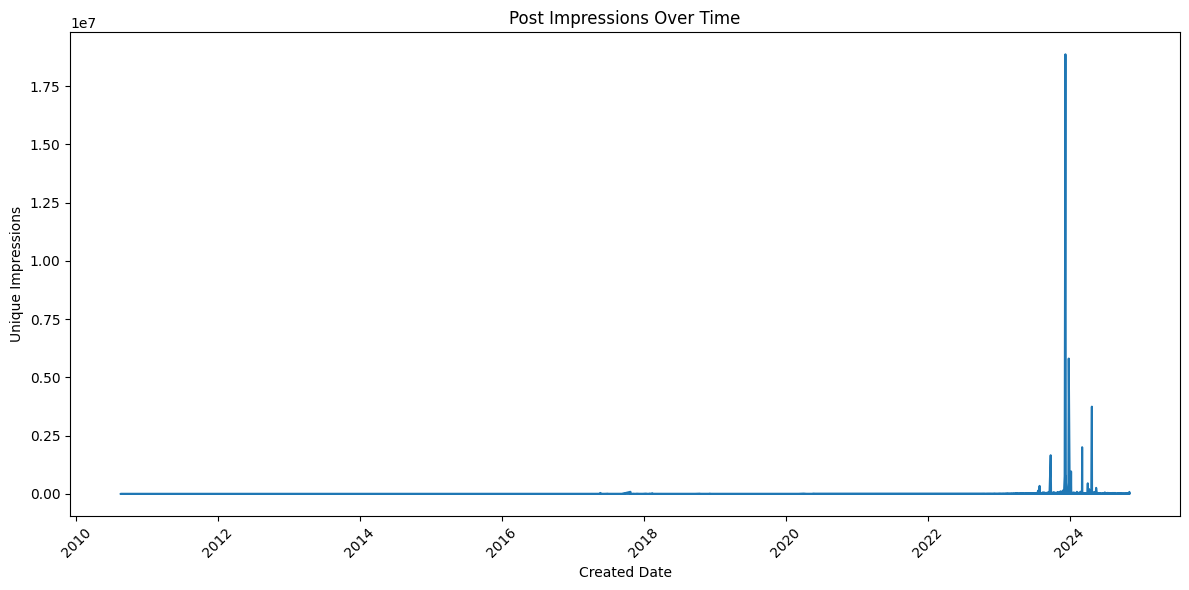

In [110]:

plt.show()

In [96]:
ig_media.sort_values(by='post_video_views', ascending=False)


,id,caption,media_type,media_url,permalink,thumbnail_url,timestamp,comments_count,media_product_type,post_impressions_unique,reach,saved,post_activity_by_action_type_like,post_activity_by_action_type_comment,post_activity_by_action_type_share,post_video_views,total_interactions,follows,profile_visits,profile_activity,post_video_view_time,post_video_avg_time_watched,clips_replays_count,ig_reels_aggregated_all_plays_count,engagement_rate,play_to_impression_ratio,save_to_reach_ratio,interaction_rate,avg_watch_percentage,created_date,created_time_only,platform,length
141,18401876719055685,Three art pieces we’re proud of! 🎨👀\n\n#glassp...,VIDEO,https://instagram.fhfa1-1.fna.fbcdn.net/o1/v/t...,https://www.instagram.com/reel/C0uAagHLo_H/,https://scontent.cdninstagram.com/v/t51.29350-...,2023-12-11T16:07:46+0000,1862,REELS,NaN,18860130,174184,1742977.0,1862.0,144120.0,19091857.0,2063143.0,NaN,NaN,NaN,1.456379e+11,7628.0,8823436.0,30027371.0,0.109392,NaN,0.009236,0.109392,0.000005,2023-12-11,16:07:46,IG,None
136,18411087460043387,2023 has been an incredible artistic journey –...,VIDEO,https://instagram.fhfa1-1.fna.fbcdn.net/o1/v/t...,https://www.instagram.com/reel/C1ZrE51Lfv1/,https://scontent.cdninstagram.com/v/t51.29350-...,2023-12-28T15:08:37+0000,2445,REELS,NaN,5807337,34568,343742.0,2445.0,36303.0,5818617.0,417058.0,NaN,NaN,NaN,4.376545e+10,7521.0,892964.0,6726983.0,0.071816,NaN,0.005952,0.071816,0.000017,2023-12-28,15:08:37,IG,None
80,18117578005364004,Every post brings us closer to our dream 🌟 Let...,VIDEO,https://instagram.fhfa1-1.fna.fbcdn.net/o1/v/t...,https://www.instagram.com/reel/C6MZ2-cLwFo/,https://scontent.cdninstagram.com/v/t51.29350-...,2024-04-25T18:05:09+0000,7488,REELS,NaN,3743679,13071,260330.0,7488.0,4814.0,4107087.0,285703.0,NaN,NaN,NaN,2.829914e+10,6890.0,825336.0,4942786.0,0.076316,NaN,0.003491,0.076316,0.000024,2024-04-25,18:05:09,IG,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,17884287508573850,"Shape of my heart, Gift Collection\n https://w...",IMAGE,https://scontent.cdninstagram.com/v/t51.2885-1...,https://www.instagram.com/p/CAe89iXnb3f/,NaN,2020-05-22T08:35:23+0000,0,FEED,52.0,47,1,19.0,0.0,0.0,NaN,20.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.425532,NaN,0.021277,0.425532,NaN,2020-05-22,08:35:23,IG,None
542,17894676358502674,"Elephant, Mini collection\n\nhttps://www.jeanp...",IMAGE,https://scontent.cdninstagram.com/v/t51.2885-1...,https://www.instagram.com/p/CAe80YynycN/,NaN,2020-05-22T08:34:08+0000,0,FEED,52.0,49,2,22.0,0.0,0.0,NaN,24.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.489796,NaN,0.040816,0.489796,NaN,2020-05-22,08:34:08,IG,None
543,17854307534021116,"Goat on balcony, Gift Collection \nhttps://www...",IMAGE,https://scontent.cdninstagram.com/v/t51.2885-1...,https://www.instagram.com/p/CAe8rRtH-6-/,NaN,2020-05-22T08:32:53+0000,2,FEED,55.0,50,3,23.0,2.0,0.0,NaN,28.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.560000,NaN,0.060000,0.560000,NaN,2020-05-22,08:32:53,IG,None


In [122]:
combined_df = pd.read_csv('datasets/for_dashboard/media_insights.csv')


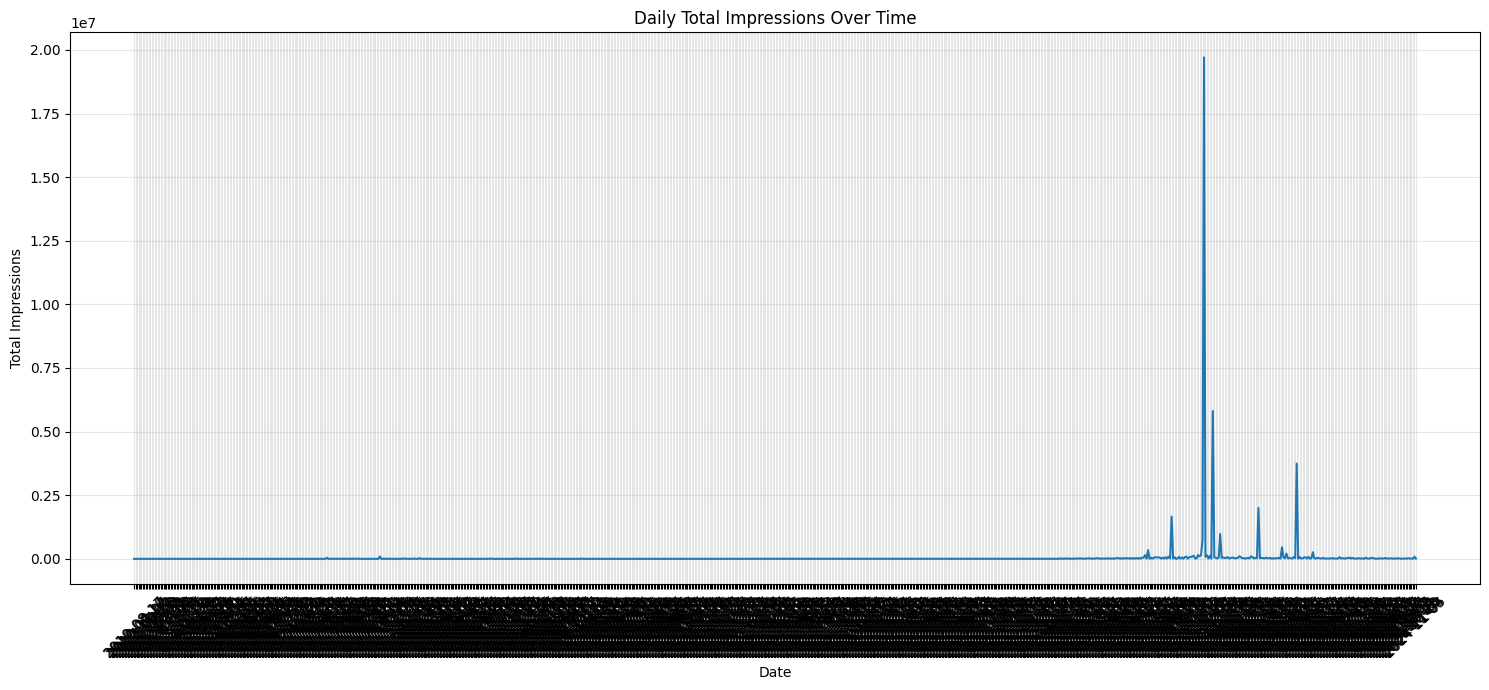

In [123]:
# Group by date and sum impressions
daily_impressions = combined_df.groupby('created_date')['post_impressions_unique'].sum().reset_index()

# Create figure with larger size
plt.figure(figsize=(15,7))

# Plot line graph
plt.plot(daily_impressions['created_date'], daily_impressions['post_impressions_unique'])

# Customize graph
plt.title('Daily Total Impressions Over Time')
plt.xlabel('Date')
plt.ylabel('Total Impressions')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()


In [124]:
daily_impressions.max()


created_date               2024-11-05
post_impressions_unique    19705465.0
dtype: object

In [125]:
# Convert created_date to datetime if not already
combined_df['created_date'] = pd.to_datetime(combined_df['created_date'])

# Group by month and sum impressions
monthly_impressions = combined_df.groupby(pd.Grouper(key='created_date', freq='M'))['post_impressions_unique'].sum()

# Check for any negative values
has_negatives = (monthly_impressions < 0).any()
print("Monthly impressions contains negative values:", has_negatives)

# Display monthly impressions
print("\nMonthly impressions:")
print(monthly_impressions)


Monthly impressions contains negative values: False

Monthly impressions:
created_date
2010-08-31         5.0
2010-09-30         2.0
2010-10-31         0.0
2010-11-30         6.0
2010-12-31         0.0
                ...   
2024-07-31    337883.0
2024-08-31    216742.0
2024-09-30    191459.0
2024-10-31    122031.0
2024-11-30    102040.0
Freq: ME, Name: post_impressions_unique, Length: 172, dtype: float64


C:\Users\Vlad\AppData\Local\Temp\ipykernel_24388\4247869704.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_impressions = combined_df.groupby(pd.Grouper(key='created_date', freq='M'))['post_impressions_unique'].sum()
